# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path)    # TODO

temps_df.head(5) 

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [33]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [34]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

temps_df["AvgTemperatureCelsius"] = ((temps_df["AvgTemperatureFahrenheit"] - 32) * 5/9)  # TODO: uncomment this line to complete it

temps_df

,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.388889
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.000000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.500000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.111111
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.055556
...,...,...,...,...,...,...,...
72727,US,Washington,45.7,2019-12-27,12,2019,7.611111
72728,US,Washington,49.6,2019-12-28,12,2019,9.777778
72729,US,Washington,48.9,2019-12-29,12,2019,9.388889
72730,US,Washington,55.0,2019-12-30,12,2019,12.777778


In [35]:
# Ex 3.3: How many different cities are there? Provide a list of them.
unique_cities_list = temps_df["City"].unique()

# Print the number of unique cities and the list of them
num_unique_cities = len(unique_cities_list)
print(f"There are {num_unique_cities} different cities.")
print("List of cities:")
print(unique_cities_list)


There are 10 different cities.
List of cities:
['Buenos Aires' 'Canberra' 'Bogota' 'Cairo' 'Munich' 'Calcutta' 'Tokyo'
 'Dakar' 'Capetown' 'Washington']


In [41]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = min(temps_df["Date"])  # TODO
max_date = max(temps_df["Date"])   # TODO

# TODO: print a message with the min and max dates

print(f"The minimum date is {min_date}, and the maximum date is {max_date}.")

The minimum date is 2000-01-01, and the maximum date is 2019-12-31.


In [44]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.

min_temp = min(temps_df['AvgTemperatureCelsius'])       # TODO
max_temp = max(temps_df['AvgTemperatureCelsius'])       # TODO

min_temp_city = temps_df.loc[temps_df['AvgTemperatureCelsius'].idxmin(), 'City']
min_temp_date = temps_df.loc[temps_df['AvgTemperatureCelsius'].idxmin(), 'Date']

max_temp_city = temps_df.loc[temps_df['AvgTemperatureCelsius'].idxmin(), 'City']
max_temp_date = temps_df.loc[temps_df['AvgTemperatureCelsius'].idxmin(), 'Date']

print(f'The minimum temperature is {min_temp}, in {min_temp_city} on {min_temp_date}. The maximum temperature is {max_temp}, in {max_temp_city} on {max_temp_date}')


The minimum temperature is -16.77777777777778, in Munich on 2000-01-25. The maximum temperature is 37.888888888888886, in Munich on 2000-01-25


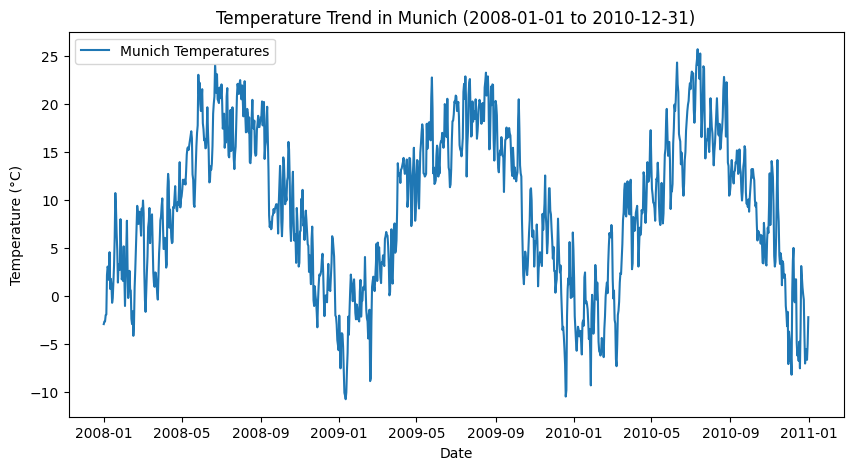

In [54]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x-axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

city_df = temps_df[temps_df["City"] == city]
city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]

plt.figure(figsize=(10, 5))


plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureCelsius"], label=f"{city} Temperatures")
plt.title(f"Temperature Trend in {city} ({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()



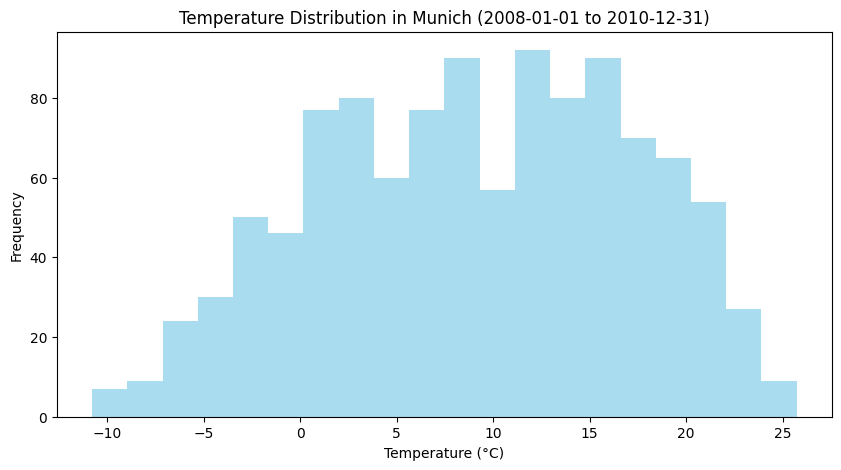

In [47]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot

plt.figure(figsize=(10, 5))

plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.7, color='skyblue')
plt.title(f"Temperature Distribution in {city} ({start_date} to {end_date})")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")

plt.show()

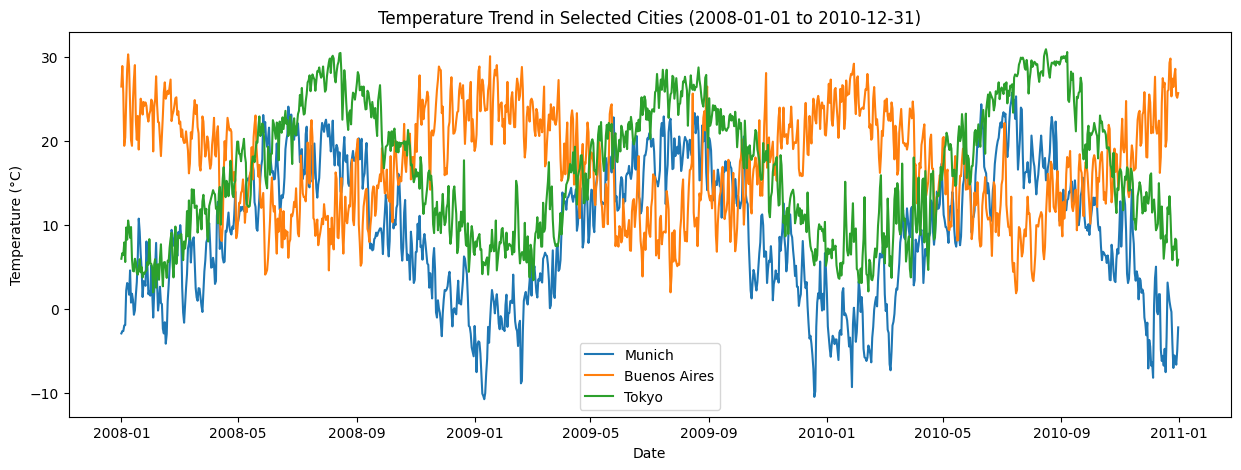

In [51]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels, and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

plt.figure(figsize=(15, 5))

for city in selected_cities:
    city_df = temps_df[temps_df["City"] == city]
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]
    plt.plot(city_df_period["Date"], city_df_period["AvgTemperatureCelsius"], label=city)

plt.title(f"Temperature Trend in Selected Cities ({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()



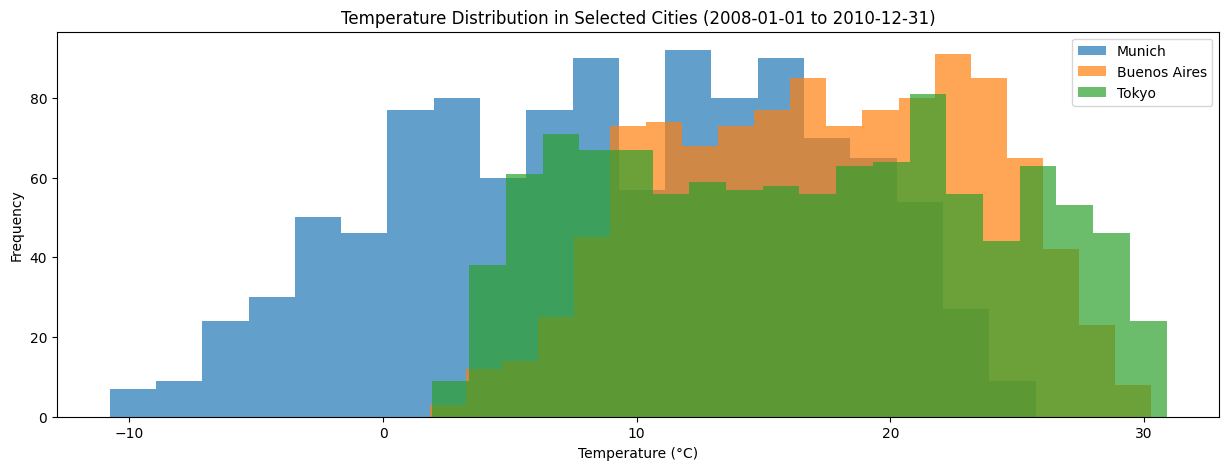

In [50]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one

plt.figure(figsize=(15, 5))

for city in selected_cities:
    city_df = temps_df[temps_df["City"] == city]
    city_df_period = city_df[(city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)]
    plt.hist(city_df_period["AvgTemperatureCelsius"], bins=20, alpha=0.7, label=city)

plt.title(f"Temperature Distribution in Selected Cities ({start_date} to {end_date})")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()

plt.show()

